# Модуль 11: Условные фильтры и сегментация

**Тема: Фильтрация и группировка данных с помощью формул
Цель**: Научить создавать условные фильтры, чтобы показывать только нужные данные, и сегментировать данные в категории на основе формул, чтобы анализировать их по группам.

## Теория
**Что такое условные фильтры?**
Условные фильтры — это когда ты пишешь формулу, чтобы отобрать только те данные, которые подходят под твои условия. Например, показать только продажи выше 1000 или заказы за последний месяц. Это как сказать Tableau: "Покажи мне только то, что я хочу, и спрячь остальное". В отличие от обычных фильтров, которые выбирают значения из списка (например, регион "West"), условные фильтры используют формулы для гибкости.
**Что такое сегментация?**
Сегментация — это когда ты делишь данные на группы (сегменты) по своим правилам. Например, разделить клиентов на "VIP" и "Обычные" в зависимости от их продаж или товары на "Прибыльные" и "Убыточные" по прибыли. Это помогает анализировать данные, выделяя важные категории.
**Как создавать условные фильтры?**  
* Создай вычисляемое поле (Create Calculated Field).  
* Напиши формулу с условием, например: SUM([Sales]) > 1000.  
* Перетащи это поле в область Filters и выбери True (или настрой диапазон).

⠀**Как создавать сегменты?**  
* Создай вычисляемое поле.  
* Напиши формулу с условиями, например:   IF SUM([Sales]) > 2000 THEN "Высокие продажи" ELSE "Низкие продажи" END
* Используй это поле в дашборде как измерение (например, в строках, столбцах или для цвета).

⠀**Как фильтры и сегментация работают с фильтрами Tableau?**  
* **Фильтры в рабочем листе**: Условные фильтры применяются *после* обычных фильтров в рабочем листе. Если у тебя стоит фильтр [Year] = 2025, условный фильтр вроде SUM([Sales]) > 1000 будет работать только с данными за 2025 год.  
* **Фильтры на уровне Data Source**: Эти фильтры (заданные в Data Source или Extract) убирают данные до любых вычислений. Если в Data Source фильтр [Order Date] = 2025, условные фильтры и сегменты будут работать только с этими данными.  
* **Фильтры табличных вычислений**: Если ты используешь табличные вычисления (например, RANK) в условном фильтре, можно настроить фильтр табличного вычисления, чтобы показать только часть данных (например, топ-3), не ломая расчёт.  
* **Совет**: Всегда проверяй фильтры в Data Source, чтобы знать, какие данные участвуют в твоих формулах.

⠀**Сравнение условных фильтров и сегментации**  
| **Что сравниваем** | **Условные фильтры** | **Сегментация** |
|:-:|:-:|:-:|
| **Что делает?** | Убирает данные, которые не подходят под условие (например, продажи < 1000). | Делит данные на группы (например, "VIP" и "Обычные" по продажам). |
| **Как выглядит?** | Показывает только отфильтрованные данные в дашборде. | Создаёт новое поле, которое можно использовать в таблице или графике. |
| **Зачем нужен?** | Чтобы сосредоточиться на нужных данных (например, только крупные заказы). | Чтобы анализировать группы (например, сравнить продажи VIP и обычных). |
| **Пример** | Показать регионы с прибылью > 0. | Разделить категории на "Высокие" и "Низкие" по продажам. |
**Почему это важно?**
Условные фильтры и сегментация делают твои дашборды умными. Фильтры позволяют показать только то, что важно (например, только прибыльные заказы), а сегментация помогает разбить данные на понятные группы (например, VIP-клиенты или убыточные товары). Это как дать пользователю лупу, чтобы он видел только нужное, или коробки, чтобы разложить данные по полочкам.

## Примеры с таблицами
**Исходная таблица базы данных** (Superstore):  
| Order ID | Category | Region | Customer Name | Order Date | Sales | Profit |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Technology | West | Anna | 2025-01-01 | 1000 | 200 |
| 2 | Technology | East | Anna | 2025-02-01 | 2000 | 400 |
| 3 | Furniture | West | Bob | 2025-01-15 | 1500 | 300 |
| 4 | Furniture | East | Bob | 2025-03-01 | 500 | -50 |
* **Условный фильтр: Продажи выше 1000**  
  * **Условие**: Хотим видеть только категории, где продажи больше 1000.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   SUM([Sales]) > 1000 // Фильтр высоких продаж
    * Перетаскиваем в Filters, выбираем True.
  * **Как работает**: Tableau проверяет каждую категорию, и если сумма продаж ≤ 1000, она исключается.  
  * **Пример**: Фильтр SUM([Sales]) > 1000 в дашборде с [Category].  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | SUM([Profit]) |
|:-:|:-:|:-:|
| Technology | 3000 | 600 |
| Furniture | 2000 | 250 |

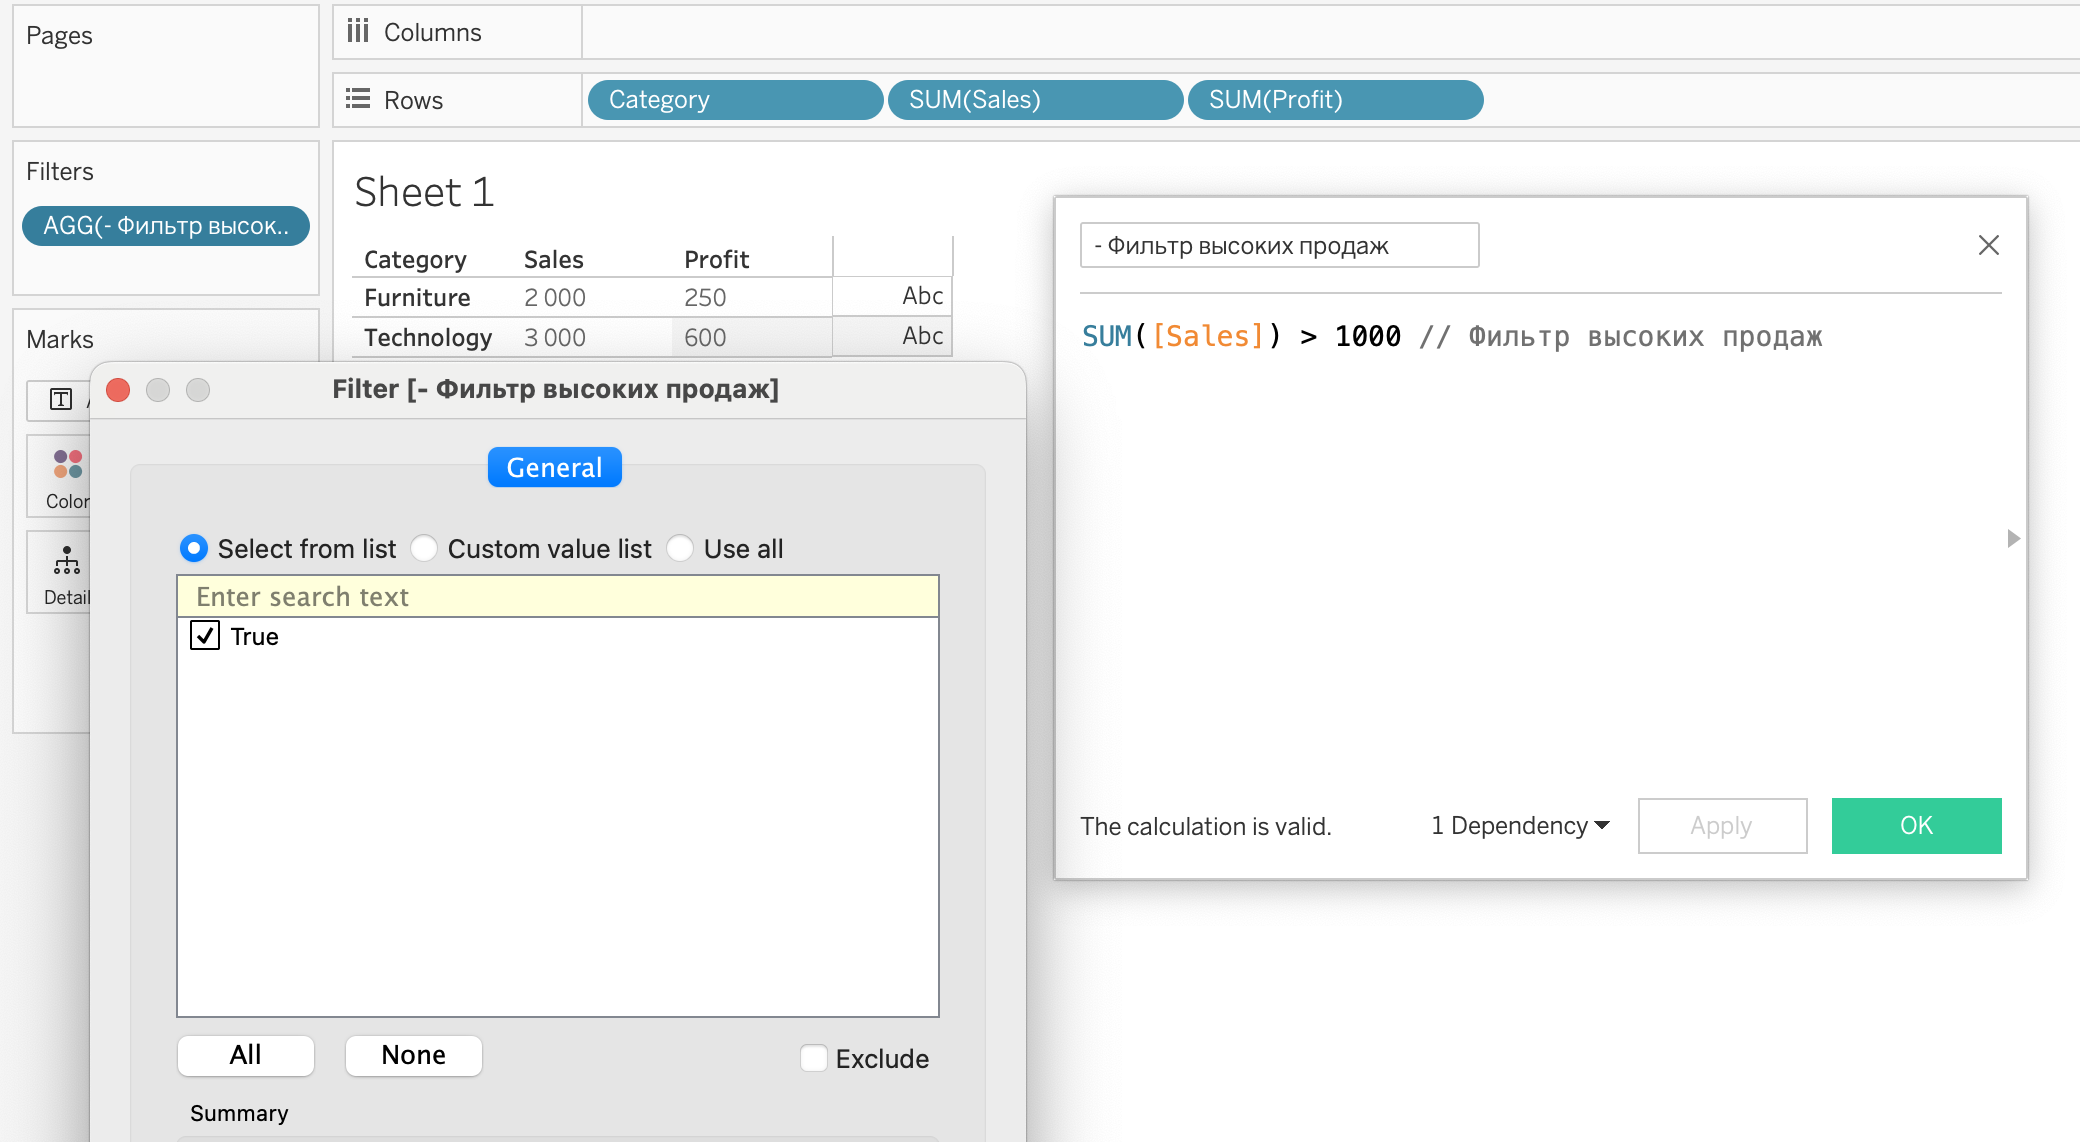

**Что получаем**: Обе категории проходят фильтр (3000 и 2000 > 1000). Если фильтр Data Source ограничивает [Order Date] = 2025-01, Furniture покажет 1500, но всё ещё пройдёт.
* **Условный фильтр: Прибыльные регионы**  
  * **Условие**: Хотим видеть только регионы с положительной прибылью.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   SUM([Profit]) > 0 // Фильтр прибыльных регионов
    * Перетаскиваем в Filters, выбираем True.
  * **Как работает**: Tableau исключает регионы, где сумма прибыли ≤ 0.  
  * **Пример**: Фильтр SUM([Profit]) > 0 в дашборде с [Region].  
**Итоговая таблица** (визуализация с [Region]):  
| Region | SUM([Sales]) | SUM([Profit]) |
|:-:|:-:|:-:|
| West | 2500 | 500 |
| East | 2500 | 350 |

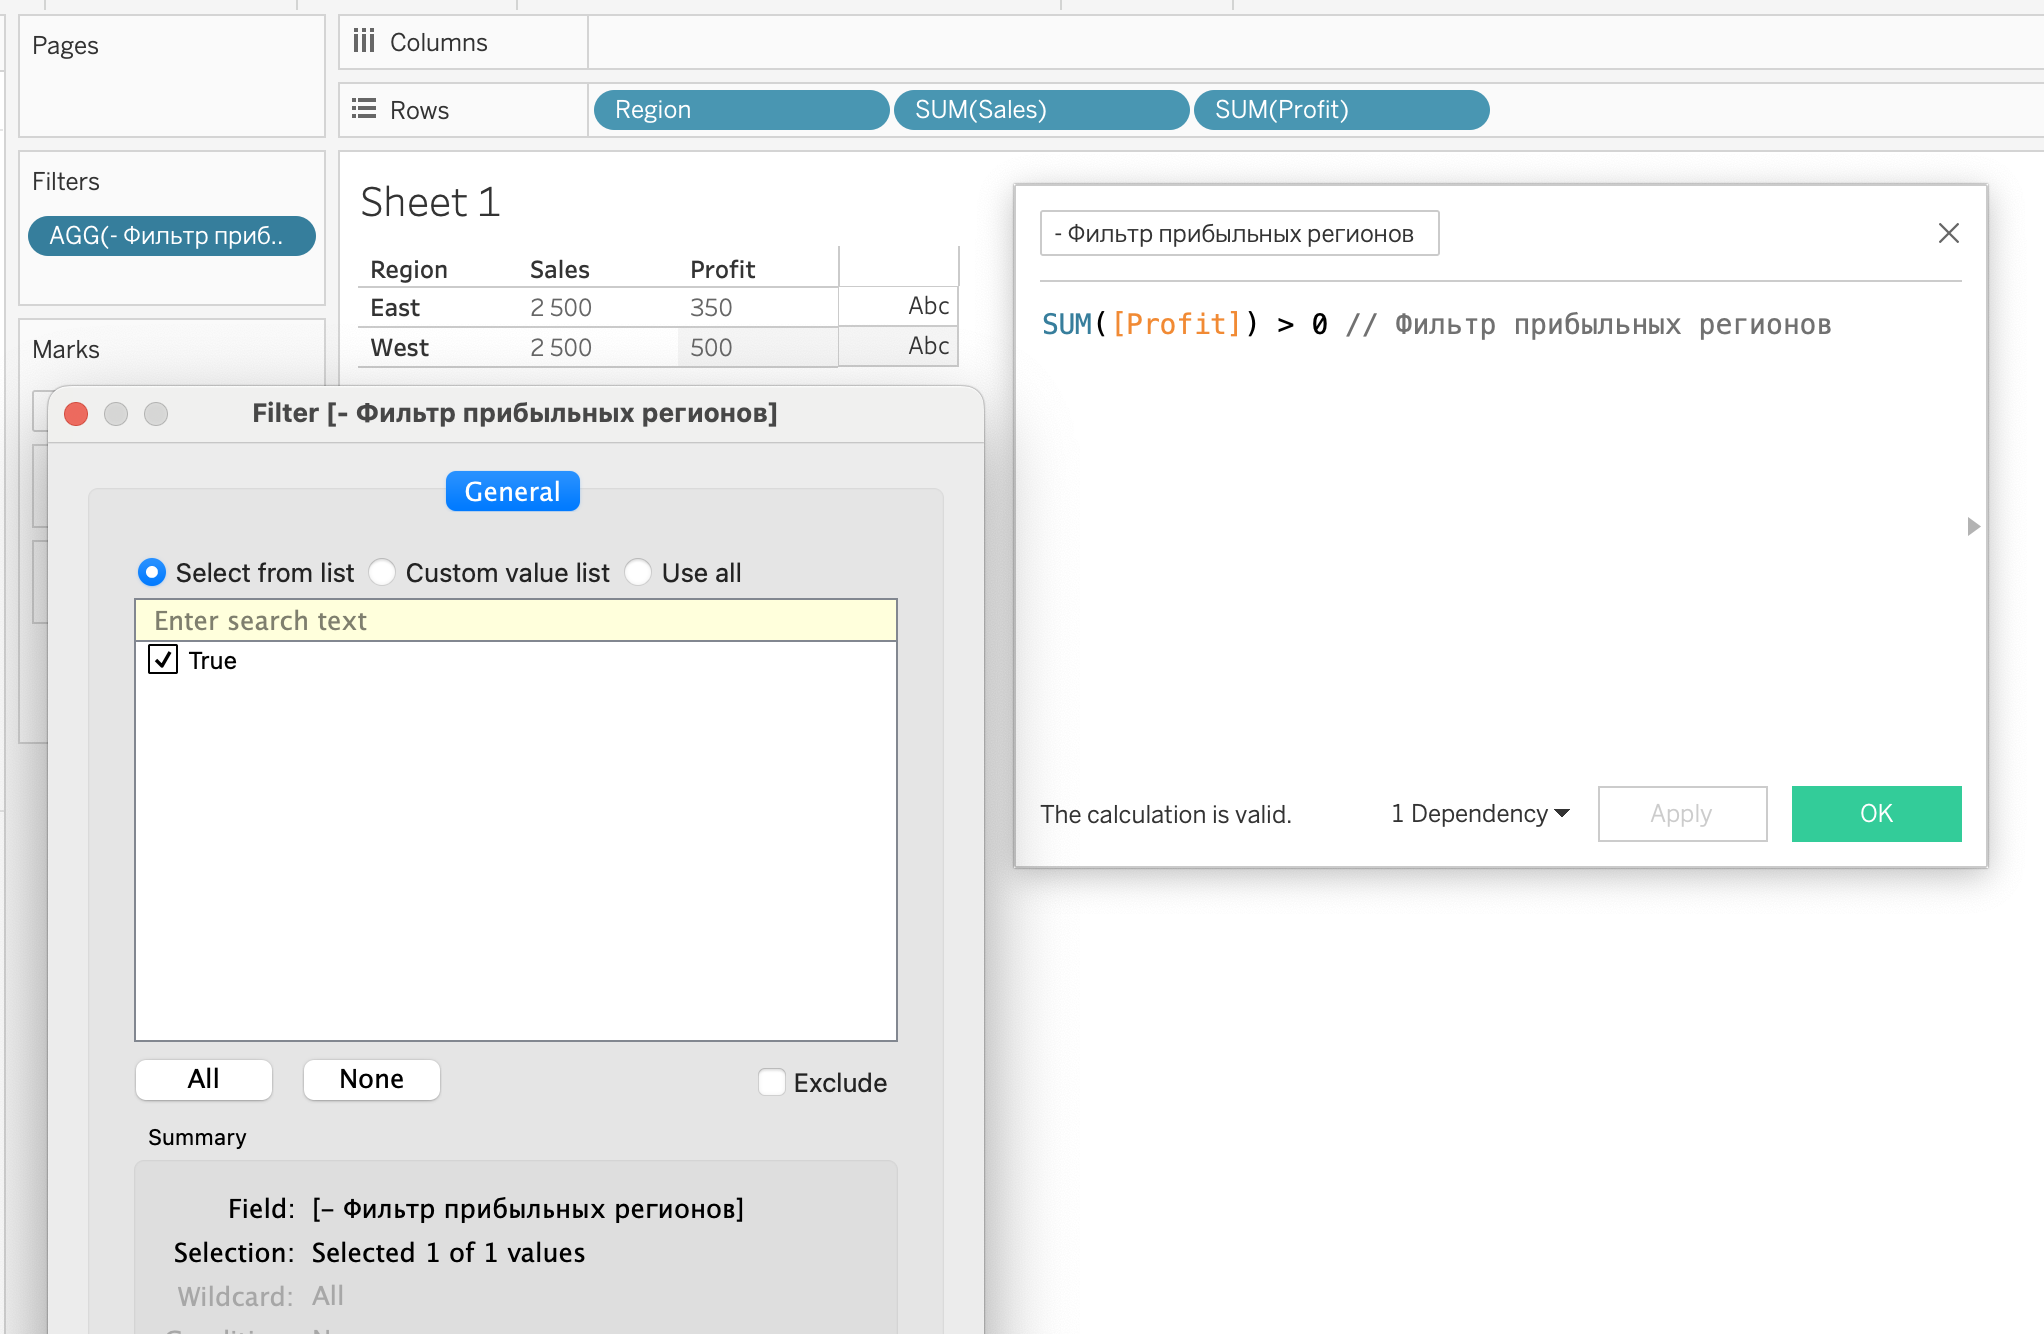

**Что получаем**: Оба региона имеют прибыль > 0, поэтому показаны. Если в Data Source фильтр [Category] = "Furniture", East исчезнет (прибыль = -50).
* **Сегментация: Клиенты по продажам**  
  * **Условие**: Хотим разделить клиентов на "VIP" (продажи ≥ 2000) и "Обычные" (продажи < 2000).  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   IF SUM([Sales]) > 2000 THEN "VIP" ELSE "Обычные" END // Сегмент клиентов
    * Используем как измерение (например, в Rows или для цвета).
  * **Как работает**: Tableau проверяет продажи каждого клиента и присваивает ему категорию.  
  * **Пример**: Сегмент в дашборде с [Customer Name].  
**Итоговая таблица** (визуализация с [Customer Name]):  
| Customer Name | SUM([Sales]) | Сегмент клиентов |
|:-------------:|:------------:|:----------------:|
| Anna          | 3000         | VIP              |
| Bob           | 2000         | Обычные          |
**Что получаем**: Anna — VIP, так как продажи > 2000, а Bob - Обычные, так как 2000 != 2000.

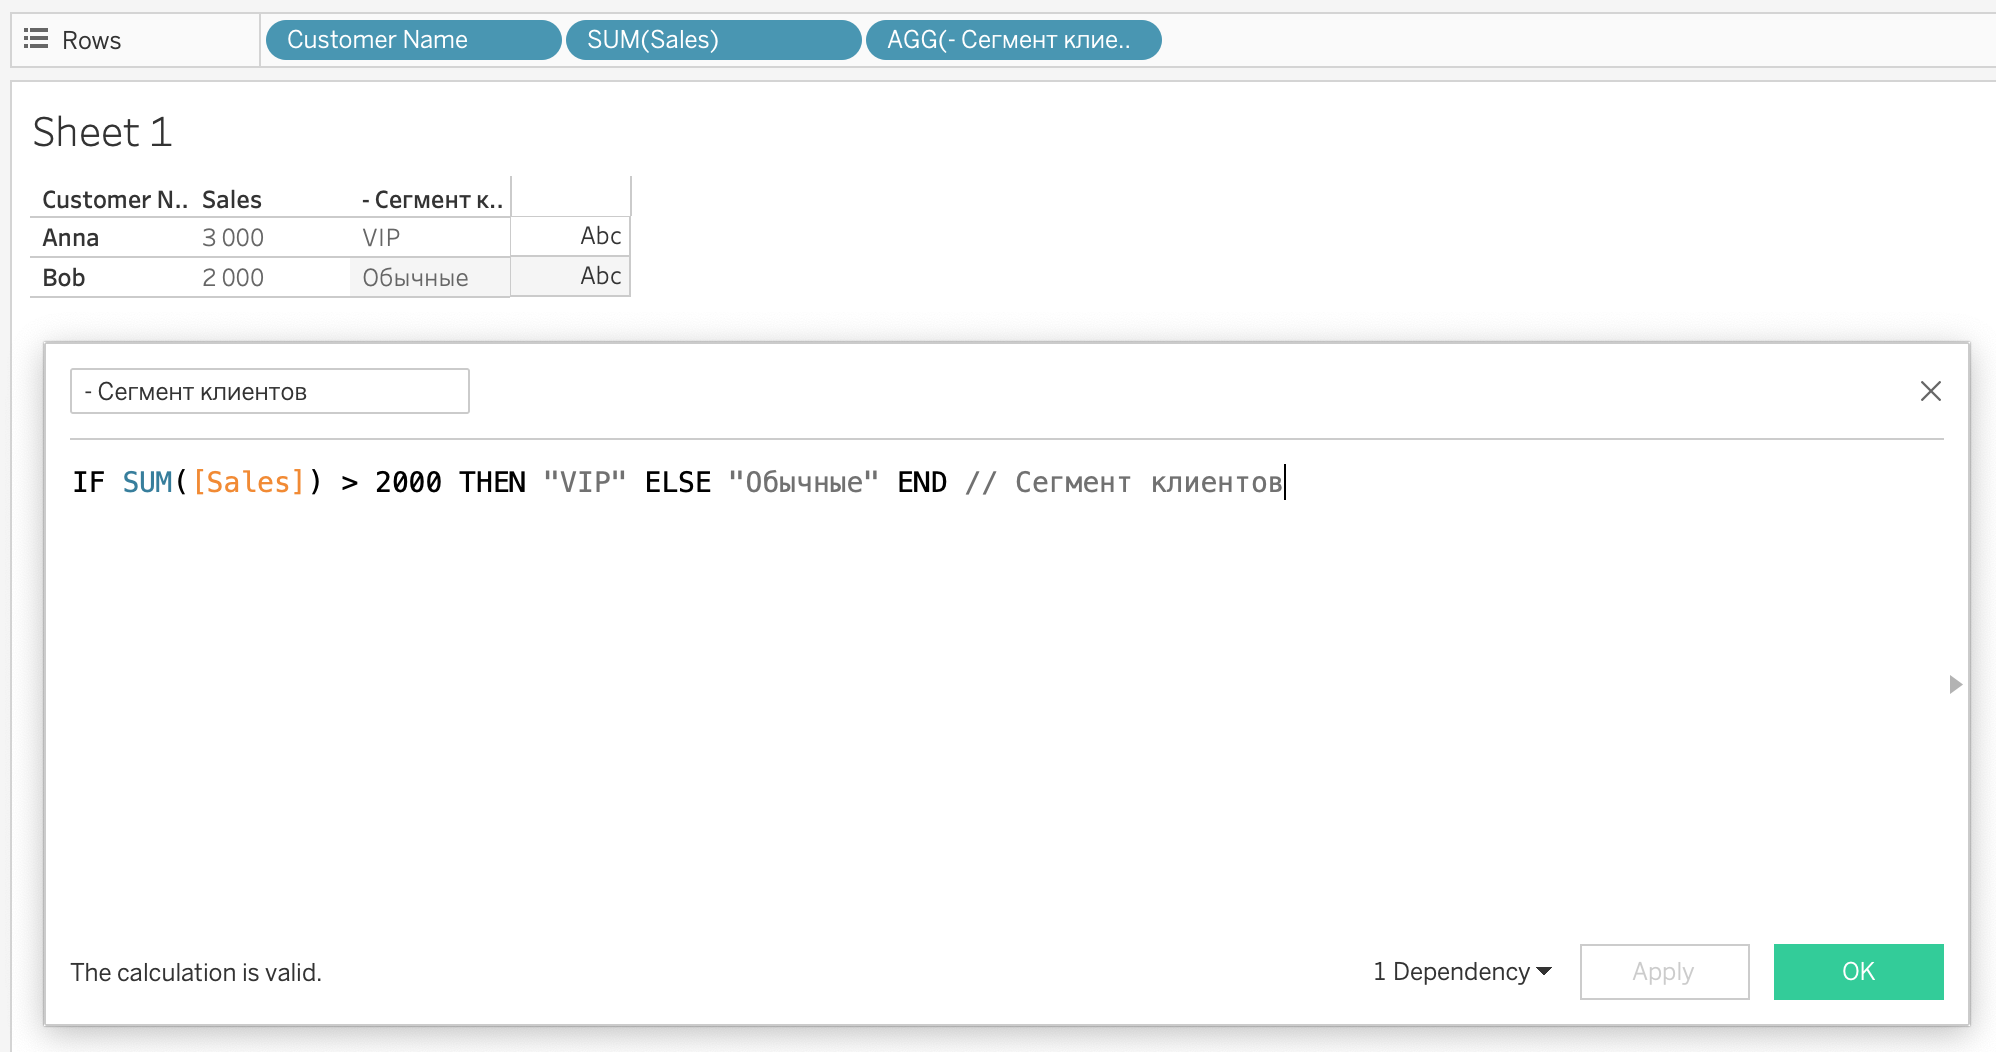

* **Сегментация: Прибыльные и убыточные категории**  
  * **Условие**: Хотим разделить категории на "Прибыльные" (прибыль > 0) и "Убыточные" (прибыль ≤ 0).  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   IF SUM([Profit]) > 0 THEN "Прибыльные" ELSE "Убыточные" END // Сегмент категорий
    * Используем в дашборде.
  * **Как работает**: Tableau группирует категории по прибыли.  
  * **Пример**: Сегмент в дашборде с [Category].  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Profit]) | Сегмент категорий |
|:-:|:-:|:-:|
| Technology | 600 | Прибыльные |
| Furniture | 250 | Прибыльные |

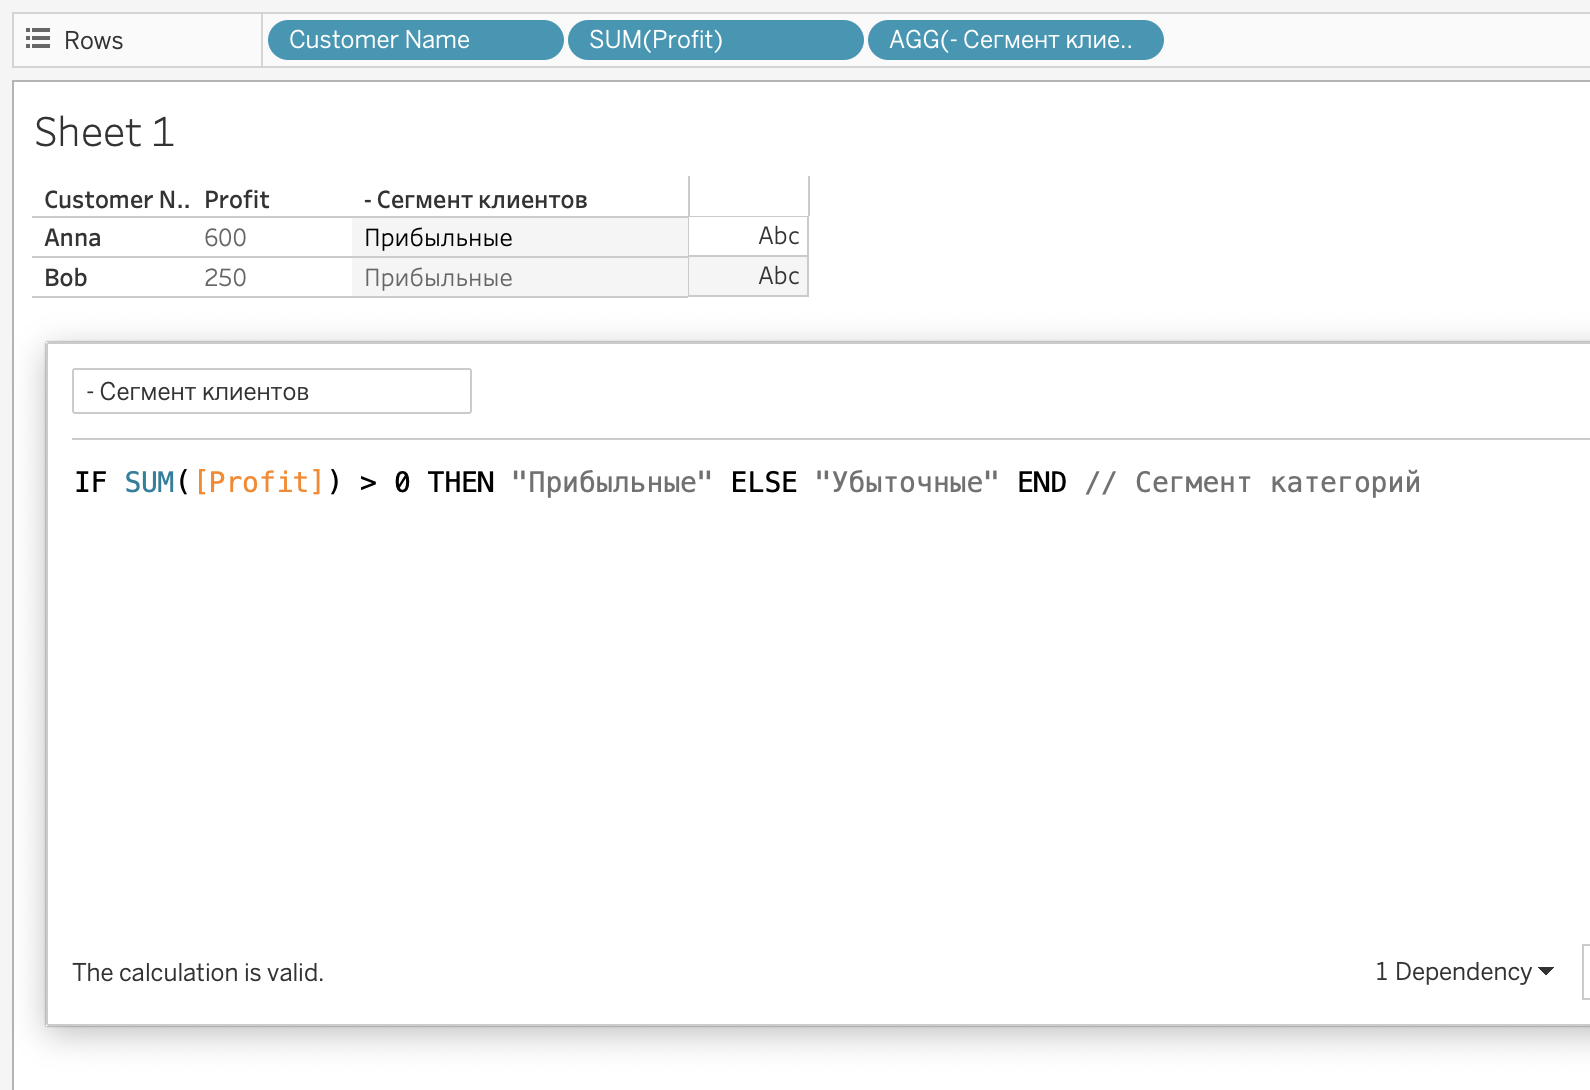

**Что получаем**: Обе категории прибыльные. Если в Data Source фильтр [Region] = "East", Furniture станет убыточной (-50).
* **Условный фильтр с датами: Заказы за последний месяц**  
  * **Условие**: Хотим видеть заказы только за последний месяц от 23 июня 2025.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   DATEDIFF('month', [Order Date], TODAY()) <= 3 // Заказы за месяц
    * Перетаскиваем в Filters, выбираем True.
  * **Как работает**: Tableau проверяет, попадает ли дата заказа в последний месяц.  
  * **Пример**: Фильтр в дашборде с [Category].  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | SUM([Profit]) |
|:-:|:-:|:-:|
| Furniture | 500 | -50 |

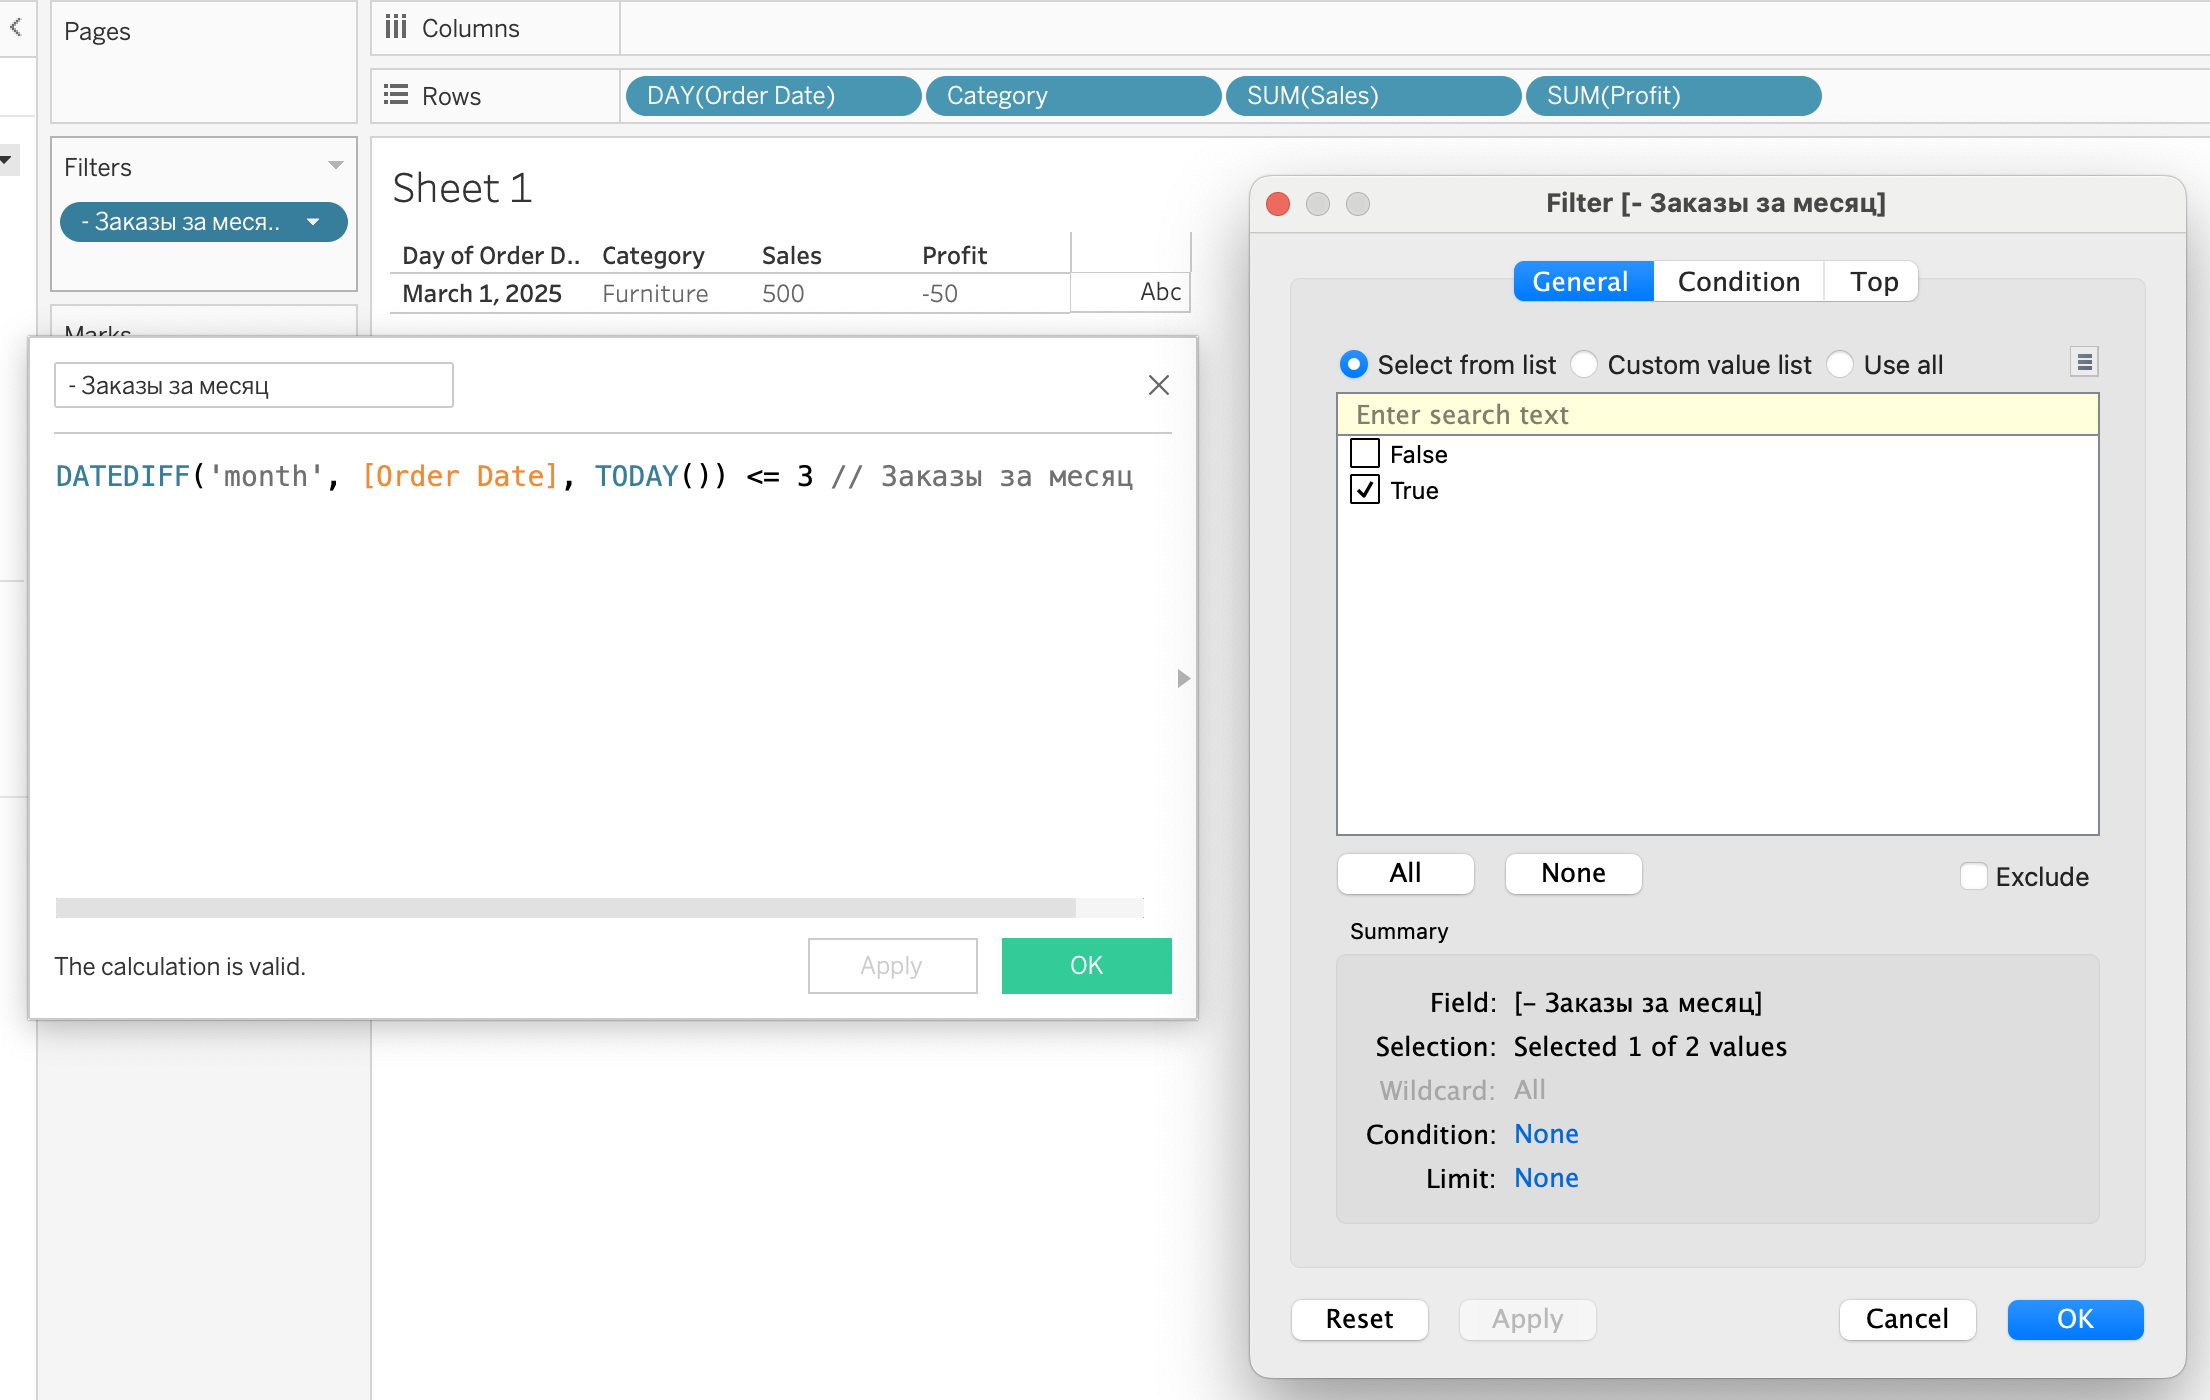

**Что получаем**: Только заказ от 2025-03-01 (Furniture, East).
* **Сегментация с параметром: Динамический порог продаж**  
  * **Условие**: Хотим, чтобы пользователь выбирал порог продаж, и разделять категории на "Высокие" и "Низкие" по этому порогу.  
  * **Что делаем**:  
    * Создаём параметр "Порог продаж" (тип: Number, диапазон: 0–5000, шаг: 100, по умолчанию: 2000).  
    * Показываем параметр.  
    * Создаём вычисляемое поле:   IF SUM([Sales]) >= [Порог продаж] THEN "Высокие" ELSE "Низкие" END // Сегмент по порогу
    * Используем в дашборде.
  * **Как работает**: Пользователь выбирает порог, и категории делятся на "Высокие" (≥ порога) и "Низкие" (< порога).  
  * **Пример**: Пользователь выбрал 2000.  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | Сегмент по порогу |
|:-:|:-:|:-:|
| Technology | 3000 | Высокие |
| Furniture | 2000 | Высокие |

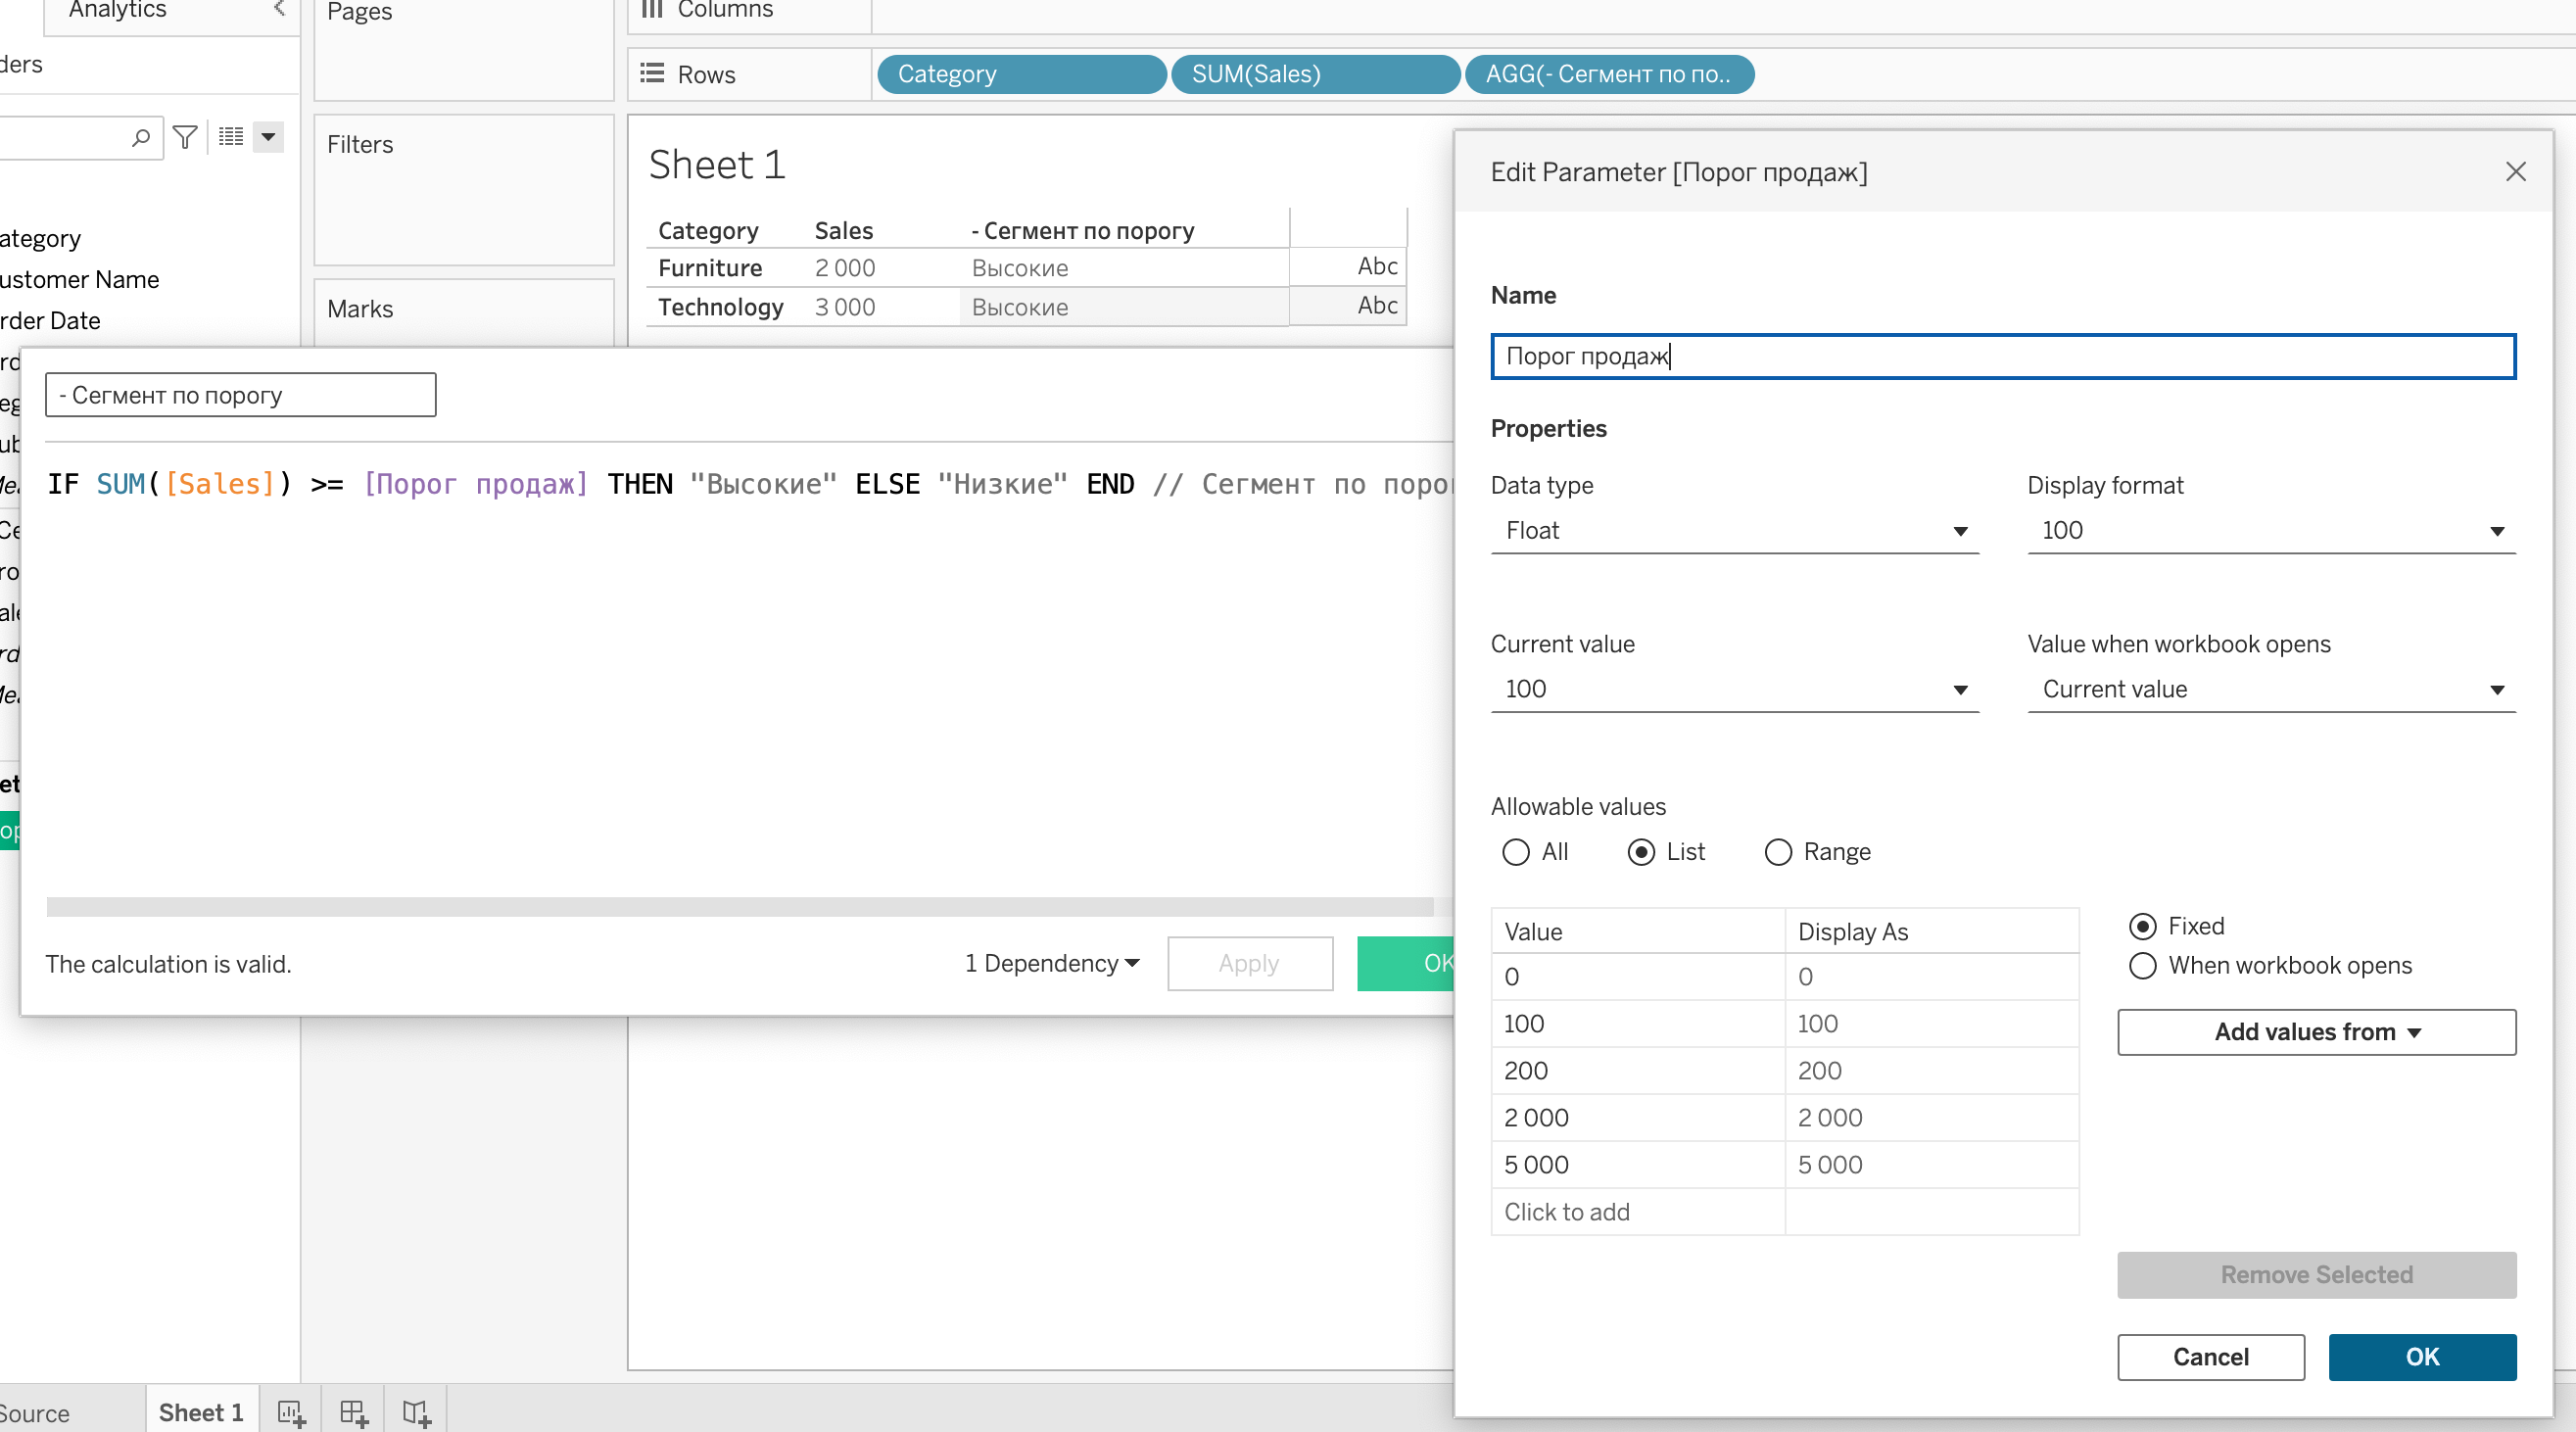

**Что получаем**: Обе категории "Высокие". Если выбрать порог 2500, Furniture станет "Низкие".
* **Условный фильтр с табличным вычислением: Топ-2 региона по продажам**  
  * **Условие**: Хотим видеть только два региона с наибольшими продажами.  
  * **Что делаем**:  
    * Создаём вычисляемое поле:   RANK(SUM([Sales])) <= 2 // Топ-2 региона
    * Перетаскиваем в Filters, выбираем True.
  * **Как работает**: Tableau считает ранг по продажам и показывает только регионы с рангом 1 или 2.  
  * **Пример**: Фильтр в дашборде с [Region], область для RANK: Table (Down).  
**Итоговая таблица** (визуализация с [Region]):  
| Region | SUM([Sales]) | SUM([Profit]) |
|:-:|:-:|:-:|
| West | 2500 | 500 |
| East | 2500 | 350 |
**Что получаем**: Оба региона (West и East) делят 1 место, так как продажи равны.

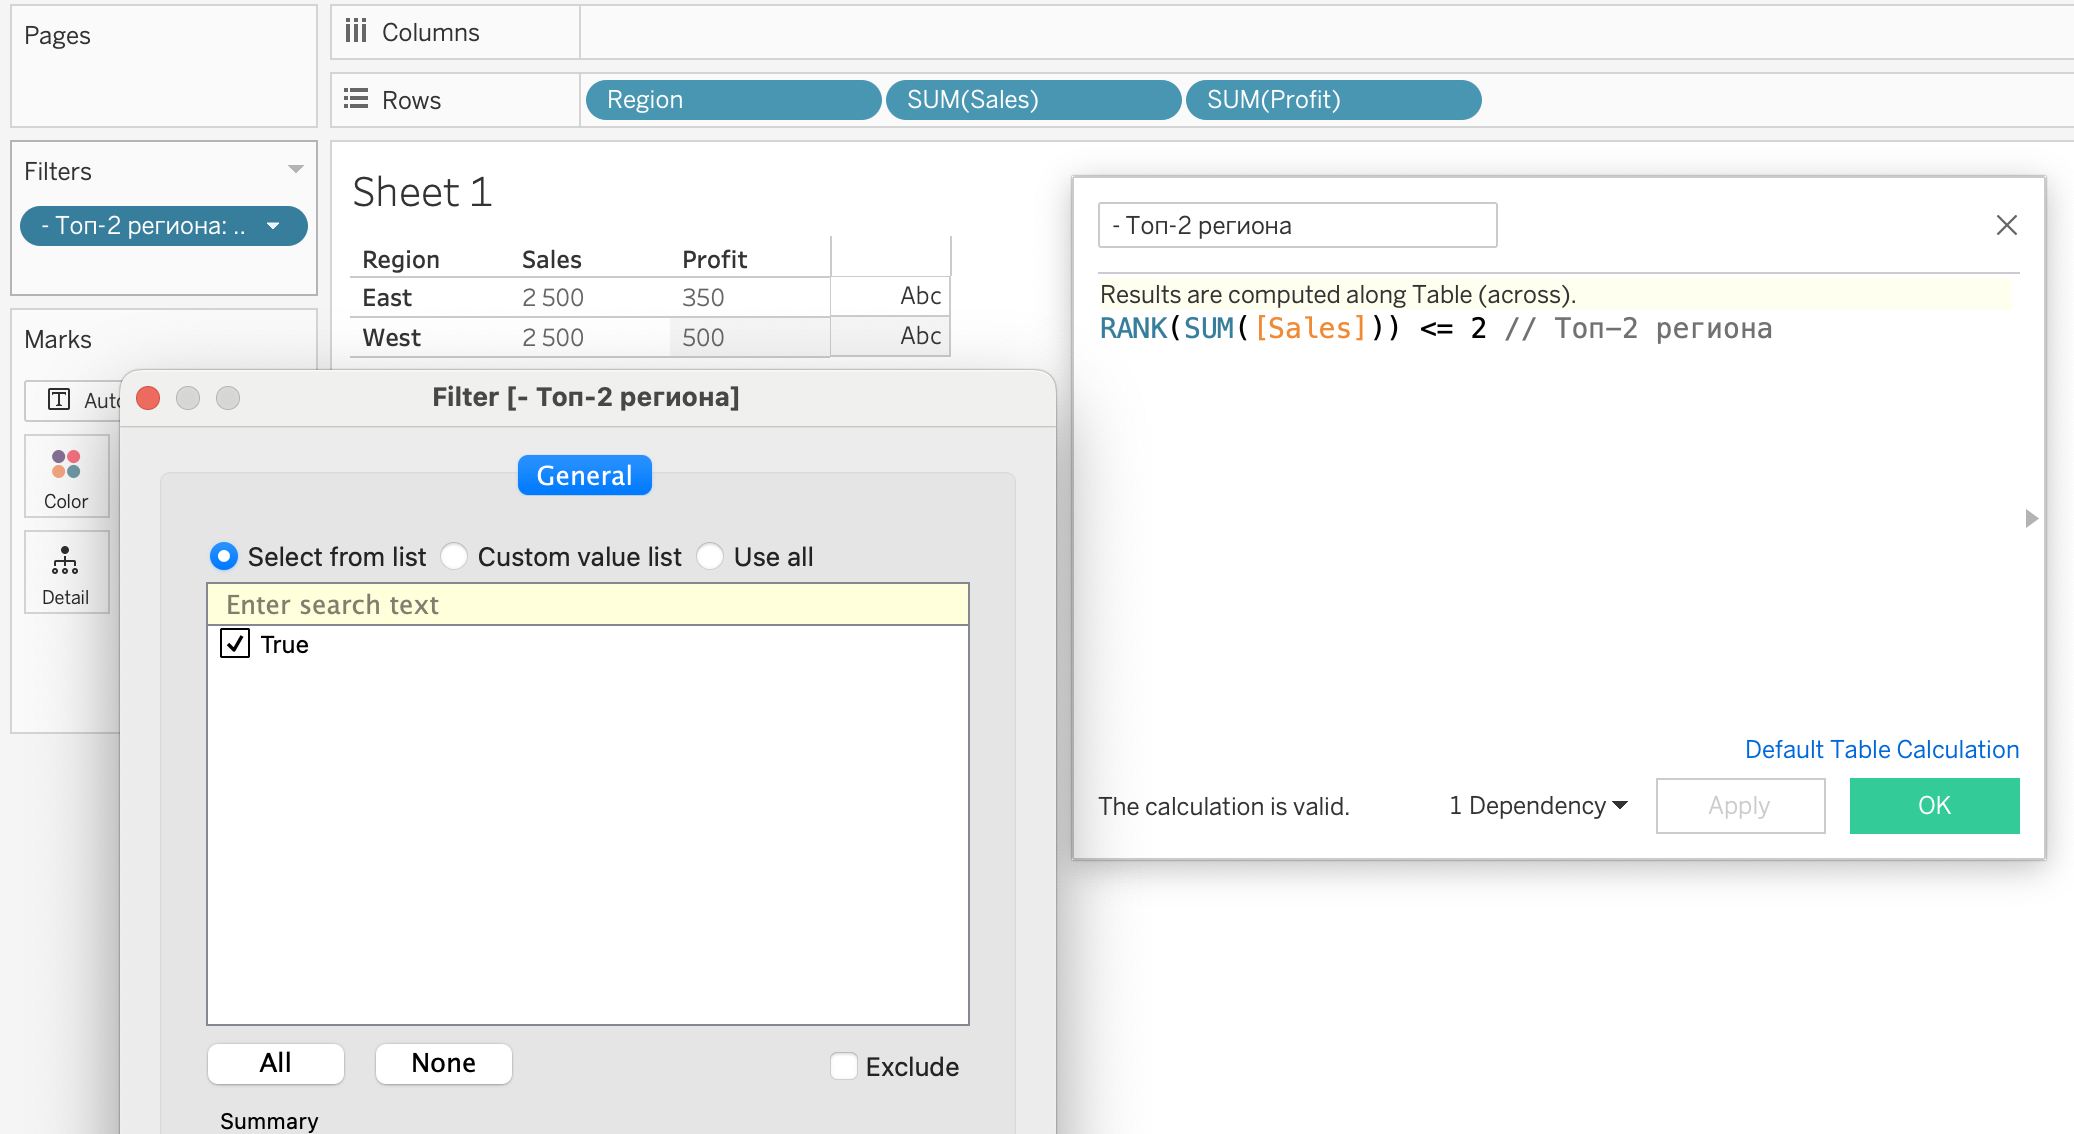

## Рекомендации для новичков
* **Думай, что хочешь отфильтровать или сгруппировать**: Решай, какие данные убрать (например, продажи < 1000) или как их разделить (например, VIP/Обычные).  
* **Тестируй в таблице**: Построй таблицу с [Category] или [Region], добавь фильтр или сегмент и проверь результат.  
* **Проверяй фильтры**: Убедись, что фильтры в рабочем листе или Data Source не убирают нужные данные. Data Source фильтры (например, [Year] = 2025) влияют на всё.  
* **Обрабатывай NULL**: Используй ZN(SUM([Sales])) в формулах, чтобы не было пропусков (см. Модуль 2).  
* **Пиши комментарии**: Добавляй // Фильтр высоких продаж или /* Сегмент клиентов */ в формулы, чтобы не запутаться.  
* **Не усложняй**: Если обычный фильтр (например, выбор региона) решает задачу, не пиши формулу (см. Модуль 4).  
* **Сочетай с параметрами**: Используй параметры (см. Модуль 10) для динамичных фильтров и сегментов, чтобы пользователь сам выбирал порог.  
* **Проверяй табличные вычисления**: Если используешь RANK в фильтре, настрой фильтр табличного вычисления, чтобы не сломать расчёт (см. Модуль 8).

## Почему это важно?
Условные фильтры и сегментация — это как ножницы и коробки для данных. Фильтры обрезают всё лишнее, чтобы ты видел только то, что нужно (например, только прибыльные регионы). Сегментация раскладывает данные по группам, чтобы ты мог сравнить, например, VIP-клиентов с обычными. Это делает твои дашборды понятными и полезными, помогая находить важные закономерности без лишнего шума.